In [284]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [285]:
data = pd.read_csv(r"D:\BackupFolder\Data Science (Data)\data\Profit Data\1000_Companies.csv")

In [286]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


<Axes: xlabel='State', ylabel='Profit'>

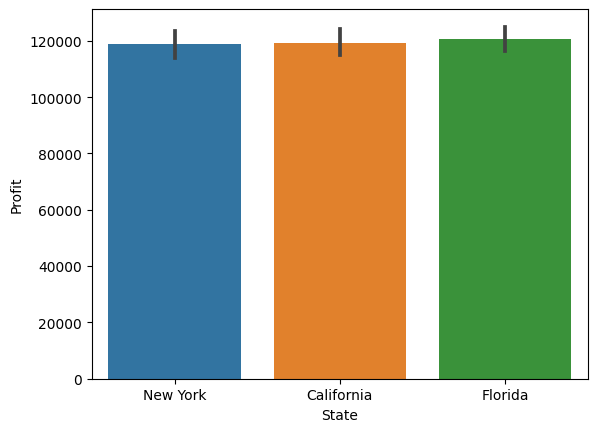

In [288]:
sns.barplot(data = data , x = "State", y = "Profit", estimator=np.mean)

In [289]:
# Handelling the Categorical Features
data = pd.get_dummies(data, columns=["State"], drop_first=True )

In [290]:
data

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,192261.83000,0,1
1,162597.70,151377.590,443898.5300,191792.06000,0,0
2,153441.51,101145.550,407934.5400,191050.39000,1,0
3,144372.41,118671.850,383199.6200,182901.99000,0,1
4,142107.34,91391.770,366168.4200,166187.94000,1,0
...,...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,95279.96251,0,0
996,134970.00,130390.080,329204.0228,164336.60550,0,0
997,100275.47,241926.310,227142.8200,413956.48000,0,0
998,128456.23,321652.140,281692.3200,333962.19000,0,0


In [291]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
State_Florida      0
State_New York     0
dtype: int64

In [292]:
features = list(data.columns)

In [293]:
features.remove("Profit")

In [294]:
X = data[features]
Y = data["Profit"]

In [295]:
# Standardisation
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features)

In [296]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.20, random_state=11)

In [297]:
model = LinearRegression()

In [298]:
model.fit(X_Train, Y_Train)

LinearRegression()

In [299]:
Y_Pred = model.predict(X_Test)

In [300]:
df1 = pd.DataFrame({"True" : Y_Test, "Predicted" : Y_Pred})

In [301]:
df1

,True,Predicted
25,107404.34000,116904.390495
464,91209.26412,91372.709591
372,169235.11220,169286.832762
730,176432.51700,176060.551920
757,60243.76480,61185.624468
...,...,...
278,61291.12602,61497.411137
449,72735.21323,72511.731872
221,121491.33040,121198.035314
741,166902.04250,167691.178631


In [302]:
r2_score(y_true=Y_Test, y_pred=Y_Pred)

0.9127019583294275

<Axes: xlabel='True', ylabel='Predicted'>

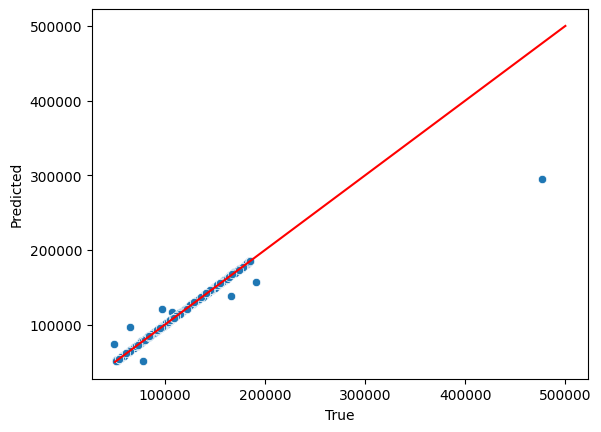

In [303]:
sns.scatterplot(data= df1, x= "True", y = "Predicted")
sns.lineplot(x = [50000, 500000], y = [50000, 500000], color = 'red')

# Regression Analysis

In [304]:
X_Const = sm.add_constant(X)
model = sm.OLS(Y, X_Const)

In [305]:
results= model.fit()

In [306]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3769.
Date:                Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:24:12   Log-Likelihood:                -10588.
No. Observations:                1000   AIC:                         2.119e+04
Df Residuals:                     994   BIC:                         2.122e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.195e+05    304.354    3

# F- Statistic

The F-Statistic informs us about whether the Independent Variables (R&D Expense, Admin Expense, Marketing Spend, State) offer a better fit, or if it is akin to predicting Profit using the Mean of Profit. It indicates the overall significance, revealing whether Profit is genuinely dependent on the input features in the population, or if the relationship merely exists in the sample.

Observing the p-value (Probability of F-statistic), which is 0.00, significantly lower than the significance level of 0.05, suggests a strong relationship exists in the population.








# R Squared

The F-Statistic informs us that a relationship does exist in the population. However, the strength of this relationship is elucidated by R Squared and Adjusted R Squared. A 95% value for R Squared suggests that 95% of the variance in Profit (the output column) is explained by the input columns, indicating a very strong relationship.

The lack of difference between R Squared and Adjusted R Squared suggests that there are no irrelevant input features; all the input features are relevant in predicting the output feature.

# Effect of Individiual Columns on Prediting the Output Features

Most columns have a p-value of 0, except for the State columns. Florida State has a p-value of 59.7%, and New York has 89.5%. The p-value indicates the likelihood that a column has no effect on the output column. The high p-values for the State columns suggest that the State does not significantly affect the output columns. This implies that for the State columns, the coefficients' values are not at all significant. In contrast, for the other columns, the State variables are significant.

# Conclusion:

Thus, we conclude that a 1-standard deviation increase (since we have standardized the input columns) in R&D Expenditure will increase profit by approximately 25,730. Similarly, a 1-standard deviation increase in Administrative Cost will boost profit by 12,940, and a 1-standard deviation increase in Marketing Expense will lead to an increase in profit by 7,422.